Running benchmarks for size: 5
  Benchmarking Selection Sort...
  Selection Sort took 0.00000 seconds.
  Benchmarking Bubble Sort...
  Bubble Sort took 0.00001 seconds.
  Benchmarking Insertion Sort...
  Insertion Sort took 0.00000 seconds.
Running benchmarks for size: 10
  Benchmarking Selection Sort...
  Selection Sort took 0.00001 seconds.
  Benchmarking Bubble Sort...
  Bubble Sort took 0.00002 seconds.
  Benchmarking Insertion Sort...
  Insertion Sort took 0.00001 seconds.
Running benchmarks for size: 20
  Benchmarking Selection Sort...
  Selection Sort took 0.00004 seconds.
  Benchmarking Bubble Sort...
  Bubble Sort took 0.00007 seconds.
  Benchmarking Insertion Sort...
  Insertion Sort took 0.00003 seconds.
Running benchmarks for size: 50
  Benchmarking Selection Sort...
  Selection Sort took 0.00017 seconds.
  Benchmarking Bubble Sort...
  Bubble Sort took 0.00038 seconds.
  Benchmarking Insertion Sort...
  Insertion Sort took 0.00021 seconds.
Running benchmarks for size: 100


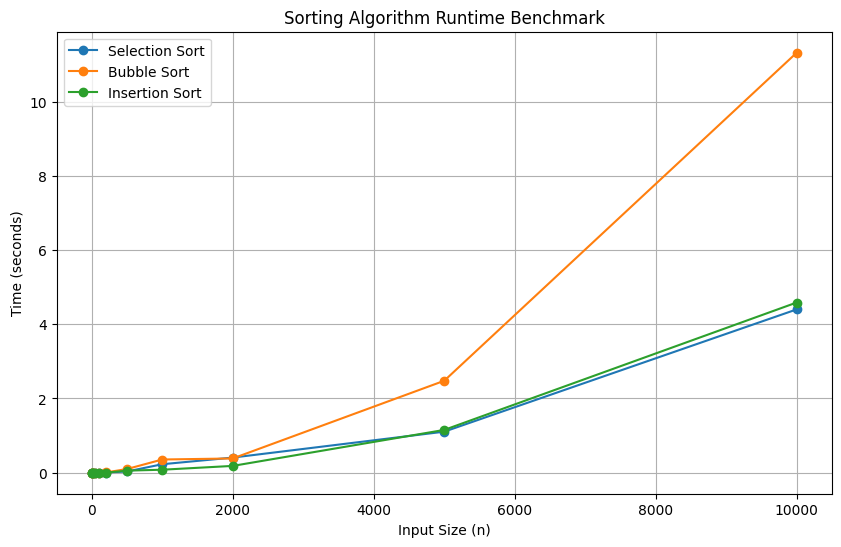

In [8]:
import random
import timeit
import matplotlib.pyplot as plt


def selectionSort(num, size):
    for step in range(size):
        min_index = step
        for i in range(step + 1, size):
            if num[i] < num[min_index]:
                min_index = i
        (num[step], num[min_index]) = (num[min_index], num[step])


def bubbleSort(num):
    for i in range(len(num)):
        for j in range(0, len(num) - i - 1):
            if num[j] > num[j + 1]:
                temp = num[j]
                num[j] = num[j + 1]
                num[j + 1] = temp


def insertionSort(num):
    n = len(num)
    if n <= 1:
        return
    for i in range(1, n):
        key = num[i]
        j = i - 1
        while j >= 0 and key < num[j]:
            num[j + 1] = num[j]
            j -= 1
        num[j + 1] = key


def benchmark_sort(sort_function, arr):
    timer = timeit.Timer(lambda: sort_function(arr.copy(), len(arr)) if sort_function == selectionSort else sort_function(arr.copy()))
    times = timer.repeat(repeat=3, number=1)
    return min(times)


sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

algorithms = {
    'Selection Sort': selectionSort,
    'Bubble Sort': bubbleSort,
    'Insertion Sort': insertionSort
}


def run_benchmarks():
    results = {name: [] for name in algorithms}

    for size in sizes:

        arr = [random.randint(0, 100000) for _ in range(size)]
        print(f"Running benchmarks for size: {size}")


        for name, algorithm in algorithms.items():
            print(f"  Benchmarking {name}...")
            time_taken = benchmark_sort(algorithm, arr)
            results[name].append(time_taken)
            print(f"  {name} took {time_taken:.5f} seconds.")


    plt.figure(figsize=(10, 6))
    for name, times in results.items():
        plt.plot(sizes, times, marker='o', label=name)

    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Runtime Benchmark')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_benchmarks()
